# Characters Classification with Neural Networks


In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |


ATTENTION! Running all the cells takes between 15 and 20 minutes on my PC.

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  1.0.1


In [2]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2048654
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [63 49 54 58 66 60 68 64 55 63]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [63 49 54 58 66 60 68 64 55 63]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


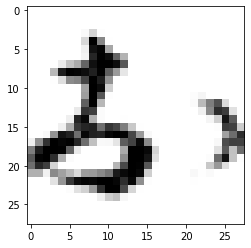

LABEL: 0
INPUT:


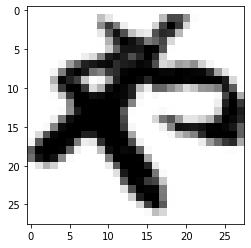

LABEL: 7
INPUT:


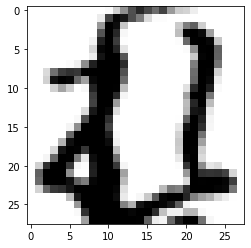

LABEL: 8


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,),
                                     (20,20,), (40,20,10),
                                     (50, 40, 30),
                                     (10, 4, 3),
                                     (35, 30, 35),
                                     (23,), (29, 28,),
                                     (21, 34)]}

#parameters = {'hidden_layer_sizes': [(i,j,k,) for i in range(33,37,1)
#                                              for j in range(28,32,1)
#                                              for k in range(33,37,1) ]}

#parameters = {'hidden_layer_sizes': [(i,) for i in range(10,40)]}
#parameters = {'hidden_layer_sizes': [(i,j,) for i in range(20,30,1)
#                                            for j in range(30,40,1)]}

mlp = MLPClassifier(max_iter=2000, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
# increasing max iteration to avoid warning

clf = GridSearchCV(mlp, parameters, cv=5)
clf.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(clf.best_params_)
best_layer_size = clf.best_params_['hidden_layer_sizes']

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
#print(clf.cv_results_)

# using pandas for better view
MLPResults = pd.DataFrame.from_dict(clf.cv_results_)
MLPResults

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (35, 30, 35)}
Score with best parameters:
0.7583333333333333

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.062563,0.364247,0.001540,0.000768,"(10,)","{'hidden_layer_sizes': (10,)}",0.741667,0.691667,0.708333,0.633333,0.700000,0.695000,0.035198,9
1,0.888168,0.291815,0.002301,0.001240,"(20,)","{'hidden_layer_sizes': (20,)}",0.766667,0.733333,0.725000,0.633333,0.733333,0.718333,0.044845,6
2,1.017018,0.201920,0.001230,0.000287,"(40,)","{'hidden_layer_sizes': (40,)}",0.775000,0.750000,0.741667,0.666667,0.766667,0.740000,0.038514,5
3,0.828229,0.139543,0.001582,0.000404,"(20, 20)","{'hidden_layer_sizes': (20, 20)}",0.766667,0.700000,0.708333,0.641667,0.725000,0.708333,0.040483,8
4,0.979317,0.120691,0.002711,0.002473,"(40, 20, 10)","{'hidden_layer_sizes': (40, 20, 10)}",0.675000,0.700000,0.658333,0.666667,0.733333,0.686667,0.027183,10
5,1.052460,0.215382,0.004439,0.003373,"(50, 40, 30)","{'hidden_layer_sizes': (50, 40, 30)}",0.766667,0.708333,0.733333,0.658333,0.708333,0.715000,0.035512,7
6,0.887157,0.580036,0.001460,0.000327,"(10, 4, 3)","{'hidden_layer_sizes': (10, 4, 3)}",0.408333,0.450000,0.116667,0.366667,0.291667,0.326667,0.117308,11
7,0.768239,0.082020,0.001620,0.000380,"(35, 30, 35)","{'hidden_layer_sizes': (35, 30, 35)}",0.816667,0.741667,0.791667,0.666667,0.775000,0.758333,0.051908,1
8,1.205586,0.206296,0.002182,0.001167,"(23,)","{'hidden_layer_sizes': (23,)}",0.808333,0.741667,0.750000,0.708333,0.750000,0.751667,0.032232,4
9,0.725421,0.180267,0.001665,0.000246,"(29, 28)","{'hidden_layer_sizes': (29, 28)}",0.791667,0.741667,0.808333,0.683333,0.758333,0.756667,0.043589,2


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
#parameters = {'batch_size': [1, 32, 97, 145, 429, 480]}
#parameters = {'batch_size': [i for i in range(200, 480)]}
parameters = {'batch_size': [32, 97, 145, 429]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

# recall to use cv=kf to use the k-fold subdivision seen in the lectures
mlp = MLPClassifier(max_iter=2000, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1,
                    hidden_layer_sizes=best_layer_size)

clf = GridSearchCV(mlp, parameters, cv=kf)
clf.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(clf.best_params_)
best_batch_size = clf.best_params_['batch_size']

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
#print(clf.cv_results_)

# using pandas for better view
MLPResults = pd.DataFrame.from_dict(clf.cv_results_)
MLPResults

RESULTS FOR NN

Best parameters set found:
{'batch_size': 429}
Score with best parameters:
0.7649999999999999

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.052284,0.499958,0.002265,0.000849,32,{'batch_size': 32},0.683333,0.616667,0.750000,0.550000,0.100000,0.540000,0.229879,4
1,0.850887,0.171770,0.004381,0.002401,97,{'batch_size': 97},0.841667,0.741667,0.750000,0.675000,0.766667,0.755000,0.053385,3
2,0.812614,0.203948,0.002022,0.000503,145,{'batch_size': 145},0.816667,0.750000,0.766667,0.658333,0.800000,0.758333,0.055277,2
3,0.879610,0.164359,0.002797,0.001497,429,{'batch_size': 429},0.850000,0.758333,0.766667,0.691667,0.758333,0.765000,0.050387,1


Trying to to perform the Grid Search making letting both of the parameters free to vary

In [10]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,),
                                     (20,20,), (40,20,10),
                                     (50, 40, 30),
                                     (10, 4, 3),
                                     (35, 30, 35),
                                     (23,), (29, 28,),
                                     (21, 34)],
              'batch_size': [32, 97, 145, 429]}

mlp = MLPClassifier(max_iter=2000, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
# increasing max iteration to avoid warning

clf = GridSearchCV(mlp, parameters, cv=5)
clf.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(clf.best_params_)
best_layer_size = clf.best_params_['hidden_layer_sizes']
best_batch_size = clf.best_params_['batch_size']

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
#print(clf.cv_results_)

# using pandas for better view
MLPResults = pd.DataFrame.from_dict(clf.cv_results_)
MLPResults

RESULTS FOR NN

Best parameters set found:
{'batch_size': 145, 'hidden_layer_sizes': (23,)}
Score with best parameters:
0.7566666666666666

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.539231,0.196296,0.003247,0.003299,32,"(10,)","{'batch_size': 32, 'hidden_layer_sizes': (10,)}",0.700000,0.625000,0.725000,0.600000,0.691667,0.668333,0.047551,35
1,0.719709,0.128591,0.001336,0.000322,32,"(20,)","{'batch_size': 32, 'hidden_layer_sizes': (20,)}",0.783333,0.733333,0.725000,0.675000,0.750000,0.733333,0.035355,18
2,0.781865,0.125743,0.001477,0.000258,32,"(40,)","{'batch_size': 32, 'hidden_layer_sizes': (40,)}",0.766667,0.766667,0.775000,0.641667,0.808333,0.751667,0.057106,4
3,1.085197,0.450521,0.001637,0.000230,32,"(20, 20)","{'batch_size': 32, 'hidden_layer_sizes': (20, ...",0.691667,0.583333,0.658333,0.600000,0.650000,0.636667,0.039651,39
4,1.743403,0.844242,0.002253,0.001375,32,"(40, 20, 10)","{'batch_size': 32, 'hidden_layer_sizes': (40, ...",0.450000,0.666667,0.566667,0.516667,0.616667,0.563333,0.075572,40
5,1.298411,0.298875,0.002324,0.001110,32,"(50, 40, 30)","{'batch_size': 32, 'hidden_layer_sizes': (50, ...",0.700000,0.675000,0.666667,0.633333,0.766667,0.688333,0.044597,29
6,0.344940,0.048747,0.001244,0.000285,32,"(10, 4, 3)","{'batch_size': 32, 'hidden_layer_sizes': (10, ...",0.408333,0.108333,0.375000,0.366667,0.300000,0.311667,0.107574,44
7,1.160342,0.376563,0.001621,0.000246,32,"(35, 30, 35)","{'batch_size': 32, 'hidden_layer_sizes': (35, ...",0.650000,0.666667,0.591667,0.616667,0.675000,0.640000,0.031358,38
8,0.647468,0.108278,0.001470,0.000238,32,"(23,)","{'batch_size': 32, 'hidden_layer_sizes': (23,)}",0.816667,0.758333,0.766667,0.700000,0.733333,0.755000,0.038586,2
9,1.031215,0.385677,0.001506,0.000341,32,"(29, 28)","{'batch_size': 32, 'hidden_layer_sizes': (29, ...",0.750000,0.641667,0.658333,0.608333,0.716667,0.675000,0.051370,32


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]
The best architecture is the one with three layers of 35, 30 and 35 nodes each.
Whatching the simpler ones, with only one layer, for the ones with fewer neurons we see probabily an underfit of the data, leading to bad results in terms of score, while the more complex ones, with more nodes are probabily overfitting the data leading to bad results too.

For what concerns the mini-batch size parameter the best result is 429. Using a minibatch size of 1 the algorithm converges very slowly and has bad performances, while using a minibatch size high, which corresponds to the standard gradient descent, we get results not satisfying.

Since I was warried that the results i got where not satifying i performed a grid search letting both of the parameters described above vary: i find this results more familiar, in particular about the architecture which is simpler, not having to be too warried about overfitting phenomena since one layer with a medium amount of neurons can be more easily generalized.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 2.01 sec

Training MLP of size (20,) ...
Done, training time: 2.08 sec

Training MLP of size (40,) ...
Done, training time: 1.27 sec

Training MLP of size (20, 20) ...
Done, training time: 1.73 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 1.95 sec

Training MLP of size (50, 40, 30) ...
Done, training time: 1.99 sec

Training MLP of size (10, 4, 3) ...
Done, training time: 2.01 sec

Training MLP of size (35, 30, 35) ...
Done, training time: 3.27 sec

Training MLP of size (23,) ...
Done, training time: 2.58 sec

Training MLP of size (29, 28) ...
Done, training time: 2.00 sec

Training MLP of size (21, 34) ...
Done, training time: 2.58 sec



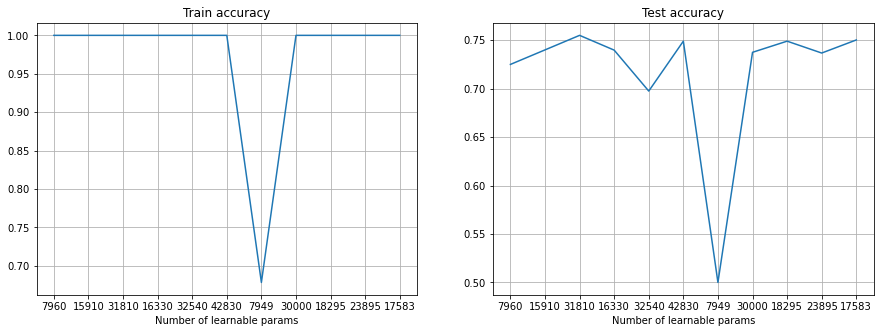

In [11]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

#hl_sizes = [(10,), (20,), (40,), (20,20,), (40,20,10)]
hl_sizes = [(10,), (20,), (40,), (20,20,), (40,20,10), (50, 40, 30), (10, 4, 3), (35, 30, 35),(23,), (29, 28,),(21, 34)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(max_iter=2000, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID,
                        learning_rate_init=.1,
                        hidden_layer_sizes=hl_size,
                        n_iter_no_change=50,
                        batch_size=best_batch_size)

    mlp.fit(X_train, y_train)

    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]
The simplest model, which is the one with only one layer of 10 neurons, has a pretty bad result considering the test accuracy, probabily due to an underfit. Increasing the number of neurons, but maintaning the number of layer, one can see that the curve has a maximum, corresponding to the best parameter (23) and then start to decrease. This means that we start to have an overfit in the data. So we do not have that increasing the number of neurons we have better and better results.

Only one configuration (10,4,3) has a bad result both in terms of train accuracy and test accuracy, in particular the test accuracy $\sim 0.5$ is a very bad result since is compatible with a random choice.



### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

In [12]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
scores = {}
parameters = {'learning_rate_init': lr_list}

mlp = MLPClassifier(max_iter=2000, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    hidden_layer_sizes=best_layer_size,
                    batch_size=best_batch_size,
                    n_iter_no_change=50)
clf = GridSearchCV(mlp, parameters, cv=5, verbose=3,
                   return_train_score = True)
clf.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(clf.best_params_)
#best_learning_rate = clf.best_params_['learning_rate_init']
best_learning_rate = 0.02

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
#print(clf.cv_results_)

# using pandas for better view
MLPResults = pd.DataFrame.from_dict(clf.cv_results_)
MLPResults


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/home/aidin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END learning_rate_init=0.0002;, score=(train=0.977, test=0.767) total time=  23.4s


/home/aidin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END learning_rate_init=0.0002;, score=(train=0.975, test=0.700) total time=  20.3s


/home/aidin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END learning_rate_init=0.0002;, score=(train=0.969, test=0.708) total time=  20.5s


/home/aidin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END learning_rate_init=0.0002;, score=(train=0.973, test=0.667) total time=  27.3s


/home/aidin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END learning_rate_init=0.0002;, score=(train=0.971, test=0.750) total time=  24.9s
[CV 1/5] END learning_rate_init=0.002;, score=(train=1.000, test=0.767) total time=   8.5s
[CV 2/5] END learning_rate_init=0.002;, score=(train=1.000, test=0.717) total time=   8.9s
[CV 3/5] END learning_rate_init=0.002;, score=(train=1.000, test=0.750) total time=  11.0s
[CV 4/5] END learning_rate_init=0.002;, score=(train=1.000, test=0.683) total time=  10.1s
[CV 5/5] END learning_rate_init=0.002;, score=(train=1.000, test=0.742) total time=  10.2s
[CV 1/5] END learning_rate_init=0.02;, score=(train=1.000, test=0.783) total time=   3.3s
[CV 2/5] END learning_rate_init=0.02;, score=(train=1.000, test=0.742) total time=   5.3s
[CV 3/5] END learning_rate_init=0.02;, score=(train=1.000, test=0.758) total time=   6.0s
[CV 4/5] END learning_rate_init=0.02;, score=(train=1.000, test=0.692) total time=   7.2s
[CV 5/5] END learning_rate_init=0.02;, score=(train=1.000, test=0.733) total time=   5.2s
[CV

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,23.272857,2.642252,0.012573,0.020618,0.0002,{'learning_rate_init': 0.0002},0.766667,0.700000,0.708333,0.666667,...,0.718333,0.035901,4,0.977083,0.975,0.96875,0.972917,0.970833,0.972917,0.002946
1,9.720895,0.936689,0.001789,0.000605,0.002,{'learning_rate_init': 0.002},0.766667,0.716667,0.750000,0.683333,...,0.731667,0.029059,3,1.000000,1.000,1.00000,1.000000,1.000000,1.000000,0.000000
2,5.396008,1.245792,0.002067,0.001250,0.02,{'learning_rate_init': 0.02},0.783333,0.741667,0.758333,0.691667,...,0.741667,0.030277,2,1.000000,1.000,1.00000,1.000000,1.000000,1.000000,0.000000
3,1.860994,0.375864,0.003421,0.003836,0.2,{'learning_rate_init': 0.2},0.808333,0.766667,0.758333,0.675000,...,0.745000,0.045522,1,1.000000,1.000,1.00000,1.000000,1.000000,1.000000,0.000000


Iteration 1, loss = 2.35657272
Iteration 2, loss = 2.35245428
Iteration 3, loss = 2.34644142
Iteration 4, loss = 2.33968101
Iteration 5, loss = 2.33214669
Iteration 6, loss = 2.32527037
Iteration 7, loss = 2.31796229
Iteration 8, loss = 2.31138191
Iteration 9, loss = 2.30450833
Iteration 10, loss = 2.29817862
Iteration 11, loss = 2.29219546
Iteration 12, loss = 2.28644342
Iteration 13, loss = 2.28043568
Iteration 14, loss = 2.27474980
Iteration 15, loss = 2.26930006
Iteration 16, loss = 2.26396981
Iteration 17, loss = 2.25903446
Iteration 18, loss = 2.25374473
Iteration 19, loss = 2.24858446
Iteration 20, loss = 2.24369077
Iteration 21, loss = 2.23890335
Iteration 22, loss = 2.23400355
Iteration 23, loss = 2.22929188
Iteration 24, loss = 2.22435442
Iteration 25, loss = 2.21977662
Iteration 26, loss = 2.21505433
Iteration 27, loss = 2.21058427
Iteration 28, loss = 2.20610776
Iteration 29, loss = 2.20165609
Iteration 30, loss = 2.19713120
Iteration 31, loss = 2.19260089
Iteration 32, los

/home/aidin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 1.75102393
Iteration 17, loss = 1.70701824
Iteration 18, loss = 1.66307031
Iteration 19, loss = 1.62103426
Iteration 20, loss = 1.57991215
Iteration 21, loss = 1.54020116
Iteration 22, loss = 1.50196049
Iteration 23, loss = 1.46535262
Iteration 24, loss = 1.43102353
Iteration 25, loss = 1.39946703
Iteration 26, loss = 1.36834458
Iteration 27, loss = 1.33841642
Iteration 28, loss = 1.30981119
Iteration 29, loss = 1.28193435
Iteration 30, loss = 1.25589352
Iteration 31, loss = 1.23177975
Iteration 32, loss = 1.20752231
Iteration 33, loss = 1.18539137
Iteration 34, loss = 1.16467671
Iteration 35, loss = 1.14429399
Iteration 36, loss = 1.12453074
Iteration 37, loss = 1.10723777
Iteration 38, loss = 1.08804000
Iteration 39, loss = 1.07059560
Iteration 40, loss = 1.05353895
Iteration 41, loss = 1.03721180
Iteration 42, loss = 1.02206921
Iteration 43, loss = 1.00623007
Iteration 44, loss = 0.99156938
Iteration 45, loss = 0.97824668
Iteration 46, loss = 0.96490374
Iteratio

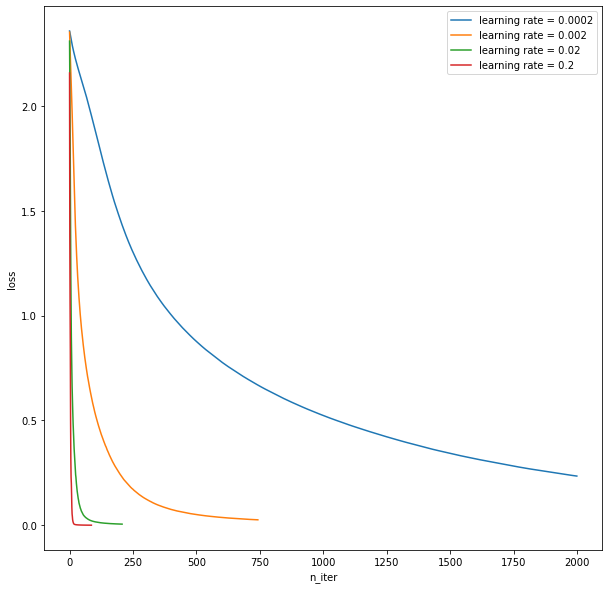

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
for l in lr_list:
    mlp = MLPClassifier(max_iter=2000, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID,
                        hidden_layer_sizes=best_layer_size,
                        batch_size=best_batch_size,
                        n_iter_no_change=50,
                        learning_rate_init=l,
                        verbose=True)
    mlp.fit(X_train, y_train)
    ax.plot(mlp.loss_curve_, label = 'learning rate = ' + str(l))
ax.set_xlabel('n_iter')
ax.set_ylabel('loss')
ax.legend()
plt.show()

! the following is just to reproduce the expected behaviour showed us in class, with the best parameters among the given ones (and not considering the new parameters added and found better then the given ones).

/home/aidin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aidin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aidin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aidin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


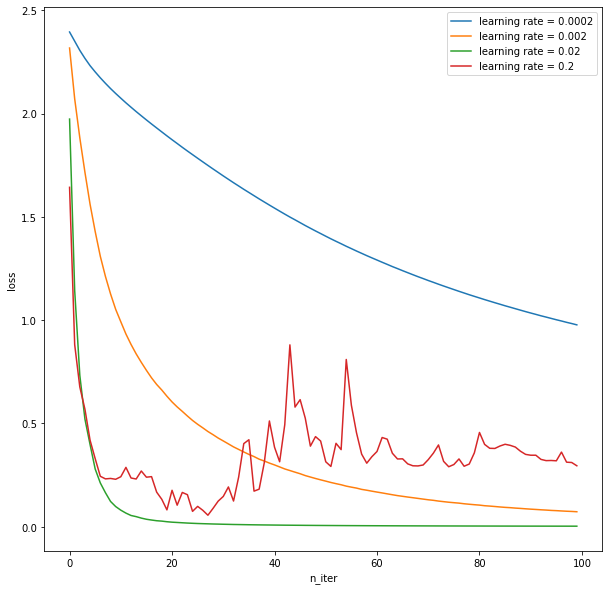

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
for l in lr_list:
    mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID,
                        hidden_layer_sizes=40,
                        batch_size=32,
                        n_iter_no_change=100,
                        learning_rate_init=l,
                        verbose=False)
    mlp.fit(X_train, y_train)
    ax.plot(mlp.loss_curve_, label = 'learning rate = ' + str(l))
ax.set_xlabel('n_iter')
ax.set_ylabel('loss')
ax.legend()
plt.show()

/home/aidin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


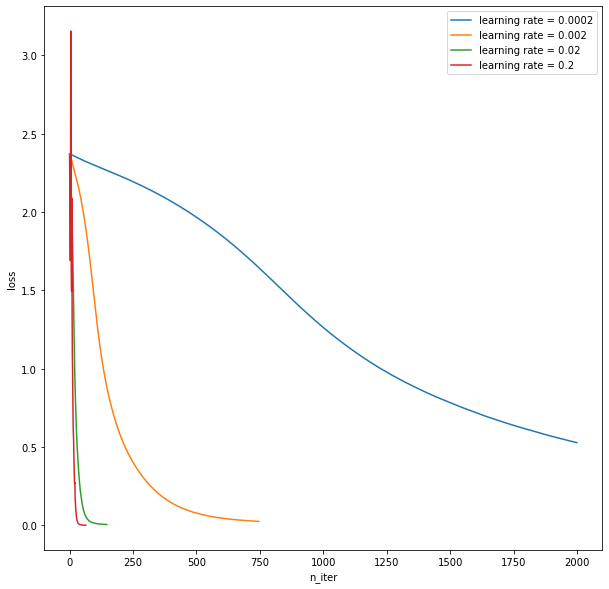

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
for l in lr_list:
    mlp = MLPClassifier(max_iter=2000, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID,
                        hidden_layer_sizes=(35,30,35),
                        batch_size=429,
                        #n_iter_no_change=100,
                        learning_rate_init=l,
                        verbose=False)
    mlp.fit(X_train, y_train)
    ax.plot(mlp.loss_curve_, label = 'learning rate = ' + str(l))
ax.set_xlabel('n_iter')
ax.set_ylabel('loss')
ax.legend()
plt.show()

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]
From the plot above one can see that while using the biggest learning rate leads to a quite immediate convergence the smallest one does not converge in the maximum number of iterations used. It is interesting to observe that using the other set of best parameters, found letting the two parameters vary one at the time, leads to different results in term of test error, giving best results for the 0.002 parameter instead (in the case of (30,35,30) for the layer sizes and 429 for the minibatch size), or the parameter 0.02 (using in the case of (40) for the layer sizes and 32 for the minibatch size).

In any case, i choose as best parameter 0.02, avoiding stability problem that I detect choosing the 'expected' best parameters.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.255500


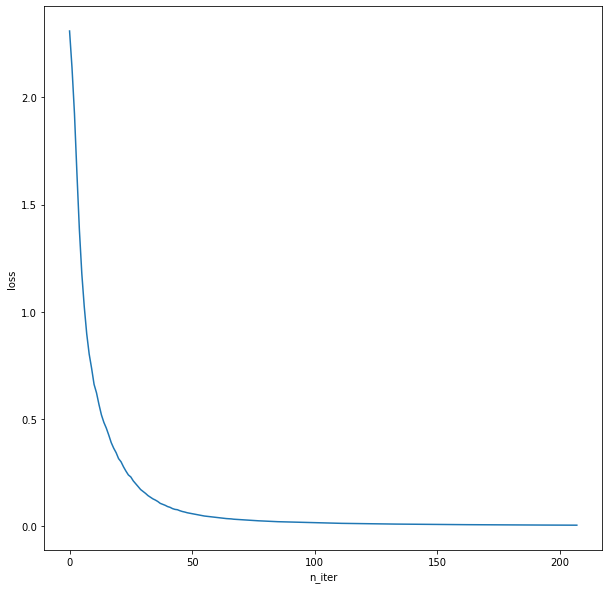

In [16]:
#get training and test error for the best NN model from CV
mlp = MLPClassifier(max_iter=2000, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID,
                        hidden_layer_sizes=best_layer_size,
                        batch_size=best_batch_size,
                        n_iter_no_change=50,
                        #verbose=True,
                        learning_rate_init=best_learning_rate)
mlp.fit(X_train, y_train)

training_error = 1 - mlp.score(X_train, y_train)
test_error     = 1 - mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(mlp.loss_curve_)
ax.set_xlabel('n_iter')
ax.set_ylabel('loss')
plt.show()

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [17]:
X = X[permutation]
y = y[permutation]

m_training = 5000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [496 503 521 493 534 487 511 481 494 480]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

Iteration 1, loss = 1.67811228
Iteration 2, loss = 0.85192741
Iteration 3, loss = 0.66524927
Iteration 4, loss = 0.57347980
Iteration 5, loss = 0.51281506
Iteration 6, loss = 0.46452171
Iteration 7, loss = 0.42980199
Iteration 8, loss = 0.39781303
Iteration 9, loss = 0.37421868
Iteration 10, loss = 0.35267791
Iteration 11, loss = 0.33185021
Iteration 12, loss = 0.31211805
Iteration 13, loss = 0.29461150
Iteration 14, loss = 0.27880749
Iteration 15, loss = 0.26320328
Iteration 16, loss = 0.24777682
Iteration 17, loss = 0.23644968
Iteration 18, loss = 0.22503936
Iteration 19, loss = 0.21409530
Iteration 20, loss = 0.20292248
Iteration 21, loss = 0.19155837
Iteration 22, loss = 0.18341186
Iteration 23, loss = 0.17530175
Iteration 24, loss = 0.16546770
Iteration 25, loss = 0.15646456
Iteration 26, loss = 0.14893743
Iteration 27, loss = 0.14197858
Iteration 28, loss = 0.13474126
Iteration 29, loss = 0.12886796
Iteration 30, loss = 0.12482723
Iteration 31, loss = 0.11676302
Iteration 32, los

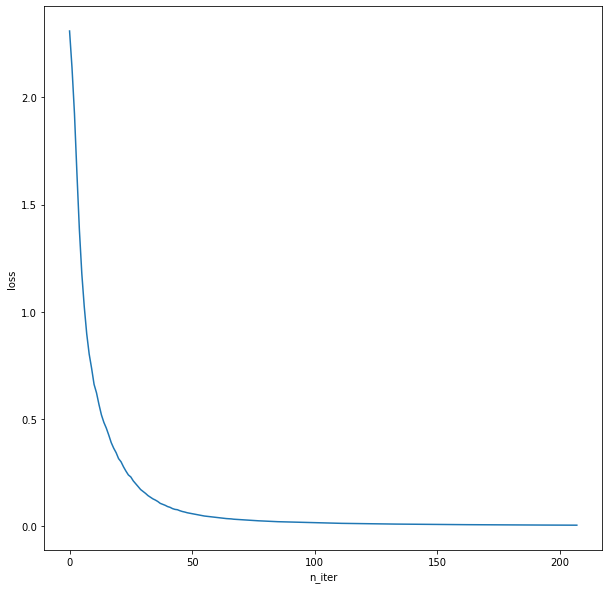

In [18]:
# use best architecture and params from before
mlp_large = MLPClassifier(max_iter=2000, alpha=1e-4, solver='sgd',
                          tol=1e-4, random_state=ID,
                          hidden_layer_sizes=best_layer_size,
                          batch_size=best_batch_size,
                          n_iter_no_change=50,
                          verbose=True,
                          learning_rate_init=best_learning_rate)
mlp_large.fit(X_train, y_train)


print ('\nRESULTS FOR NN\n')

#get training and test error for the NN
training_error = 1 - mlp_large.score(X_train, y_train)
test_error     = 1 - mlp_large.score(X_test, y_test)

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(mlp.loss_curve_)
ax.set_xlabel('n_iter')
ax.set_ylabel('loss')
plt.show()


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

While the training error for both is 0, the test error, as we expected, is better using more samples for training ( 0.26 vs 0.16 ).
Looking at the plots the behaviours seem very similar and I don't detect any important difference.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


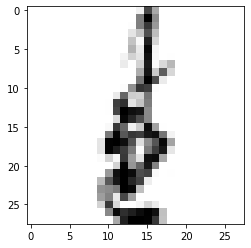

LABEL: 8
Index: 8
Large NN prediction:  8
NN prediction:  6
INPUT:


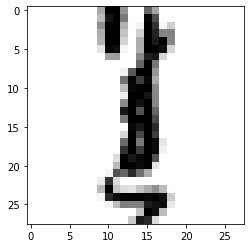

LABEL: 8
Index: 9
Large NN prediction:  8
NN prediction:  6
INPUT:


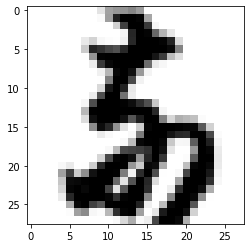

LABEL: 4
Index: 13
Large NN prediction:  4
NN prediction:  6
INPUT:


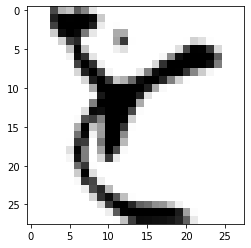

LABEL: 9
Index: 14
Large NN prediction:  9
NN prediction:  1
INPUT:


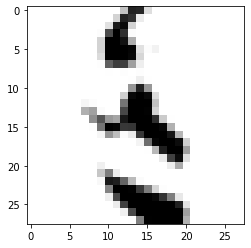

LABEL: 1
Index: 18
Large NN prediction:  1
NN prediction:  2
INPUT:


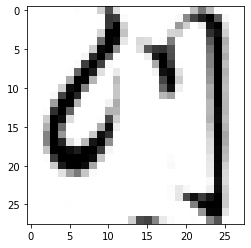

LABEL: 3
Index: 20
Large NN prediction:  3
NN prediction:  0


In [19]:
NN_prediction = mlp.predict(X_test)
large_NN_prediction = mlp_large.predict(X_test)

counter = 0
for index, input, prediction_large, prediction, label in zip(range(len(X_test)), X_test, large_NN_prediction, NN_prediction, y_test):
    if prediction != label and prediction_large == label:
        #print('input,',input, ', has been classified as', predictionLR, 'by the Logistic Regression and should be', label)
        plot_input(X_test, y_test, index)
        print('Index:', index)
        print("Large NN prediction: ", large_NN_prediction[index])
        print("NN prediction: ", NN_prediction[index])
        counter += 1
    if counter > 5:
        break

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


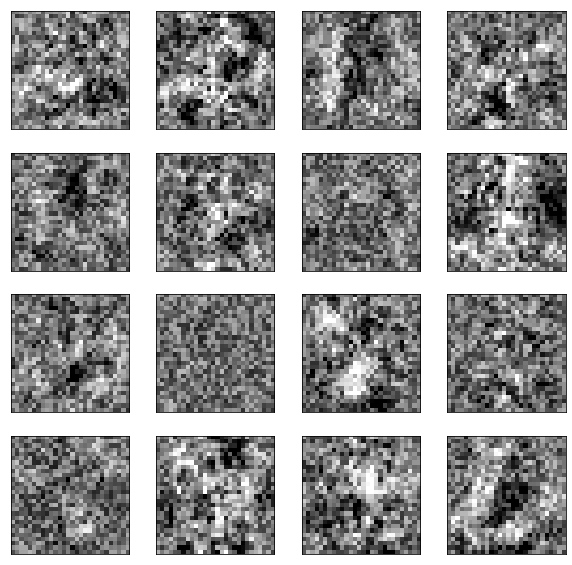

Weights with 5000 data points:


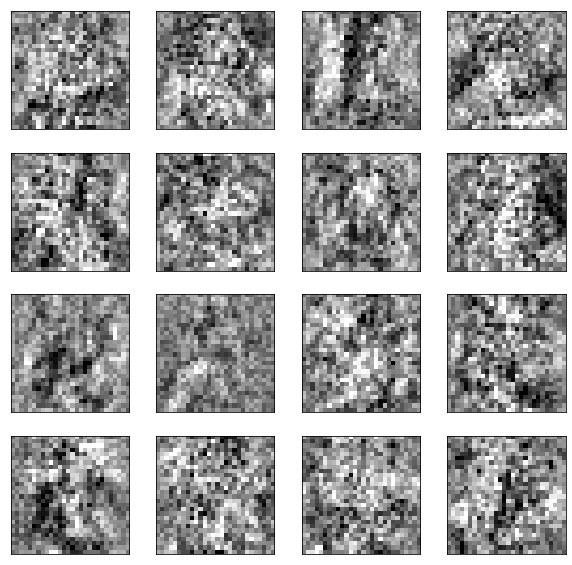

In [20]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4, figsize=(10,10))
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()


print("Weights with 5000 data points:")

fig, axes = plt.subplots(4, 4, figsize=(10,10))
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]
Looking at the weights one can recognize some pattern of the japanese characters we are studying, while in others at naked eye one can't detect anything other than random noise.
In particular, comparing the two plots one can guess what the algorithm is trying to do: removing the random noise for having a more recognizable picture.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [21]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:]#2*m_training]
y_train, y_test = y[:m_training], y[m_training:]#2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting
C_best      = 10
gamma_best  = 0.01

SVM = SVC(kernel = 'rbf', C = C_best, gamma = gamma_best)
SVM.fit(X_train, y_train)

print ('RESULTS FOR SVM')

SVM_training_error = 1 - SVM.score(X_train, y_train)
print("Training score SVM:")
print(SVM_training_error)

SVM_test_error     = 1 - SVM.score(X_test,  y_test )
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.0
Test score SVM:
0.08025454545454547


In [22]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C=1, max_iter=4000)
regL2.fit(X_train, y_train)

# you can re-use your code from Lab 2
print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error = 1-regL2.score(X_train, y_train)
test_error = 1 - regL2.score(X_test, y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.022600
Test error (reg): 0.237855


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

As one can see comparing the test errors, the best results are provided by the SVM method, followed by NN and the logistic regression. This behaviour is what we expected since the NN works better than the other methods growing the complexity, with deep learning. 
We can see the behaviour for each character comparing the confusion matrixes in the plot provided at the end of this notebook.

In [23]:
LR_prediction = regL2.predict(X_test)
SVM_prediction = SVM.predict(X_test)

from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)


confusion_LNN = confusion_matrix(y_test, large_NN_prediction)
print("\n Confusion matrix Large NN\n\n", confusion_LNN)
print("\n Confusion matrix Large NN (normalized)\n\n", confusion_LNN /counts[:,None] )
confusion_LNN_n = confusion_matrix(y_test, large_NN_prediction, normalize='true')
print("\n Confusion matrix Large NN (normalized directly)\n\n", confusion_LNN_n)

confusion_NN  = confusion_matrix(y_test, NN_prediction)
print("\n Confusion matrix NN\n\n", confusion_NN)
print("\n Confusion matrix NN (normalized)\n\n", confusion_NN /counts[:,None] )
confusion_NN_n  = confusion_matrix(y_test, NN_prediction, normalize='true')
print("\n Confusion matrix NN (normalized directly)\n\n", confusion_NN_n )

confusion_SVM = confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM\n\n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)\n\n", confusion_SVM /counts[:,None] )
confusion_SVM_n = confusion_matrix(y_test, SVM_prediction, normalize='true')
print("\n Confusion matrix SVM (normalized directly)\n\n", confusion_SVM_n)

confusion_LR  = confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR\n\n", confusion_LR)
print("\n Confusion matrix LR (normalized)\n\n", confusion_LR /counts[:,None] )
confusion_LR_n  = confusion_matrix(y_test, LR_prediction, normalize='true')
print("\n Confusion matrix LR (normalized directly)\n\n", confusion_LR_n )

Labels and frequencies in test set:  [5504 5497 5479 5507 5466 5513 5489 5519 5506 5520]

 Confusion matrix Large NN

 [[4919   19    4   22  182  103   13  121   64   57]
 [  19 4489  126   48  193   56  279   18  141  128]
 [   9  170 4265  119   80   97  405   66  133  135]
 [  26   64  161 4763  113  122   50   67  101   40]
 [ 135  140   89   46 4490   43  205  116   65  137]
 [  60  106  131  107   52 4799   54   38  132   34]
 [  20  152  358   75  194   54 4420  103   77   36]
 [  94   19   81   63  172   21  129 4827   34   79]
 [  57  170  171   81   58  114  162   18 4617   58]
 [  88  126  250   50  166   28   49   59   31 4673]]

 Confusion matrix Large NN (normalized)

 [[0.89 0.   0.   0.   0.03 0.02 0.   0.02 0.01 0.01]
 [0.   0.82 0.02 0.01 0.04 0.01 0.05 0.   0.03 0.02]
 [0.   0.03 0.78 0.02 0.01 0.02 0.07 0.01 0.02 0.02]
 [0.   0.01 0.03 0.86 0.02 0.02 0.01 0.01 0.02 0.01]
 [0.02 0.03 0.02 0.01 0.82 0.01 0.04 0.02 0.01 0.03]
 [0.01 0.02 0.02 0.02 0.01 0.87 0.01 0.01 

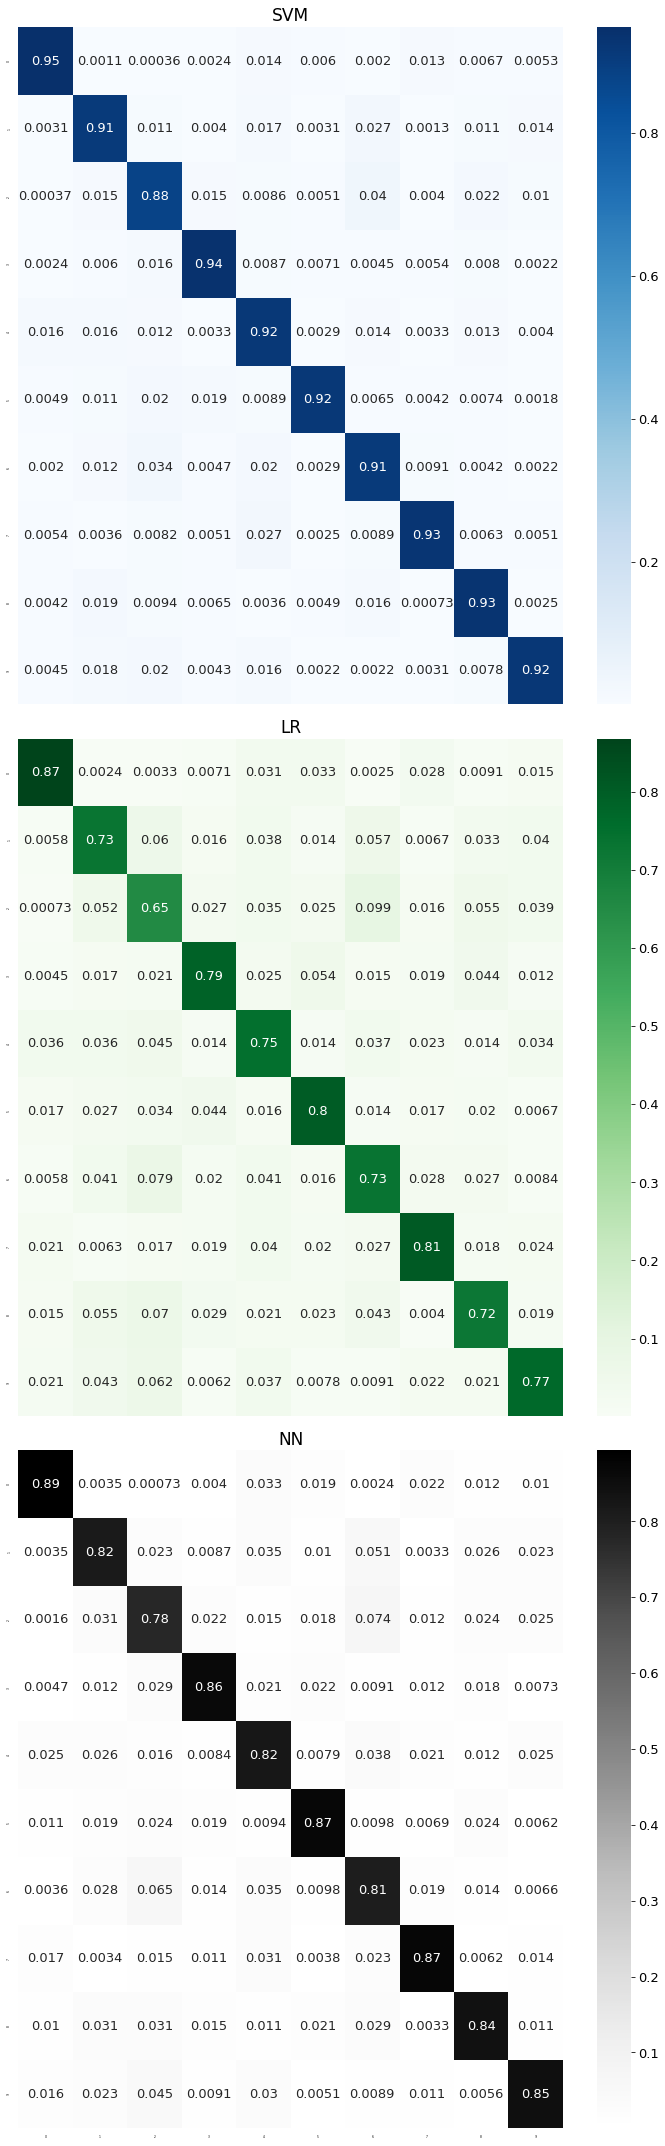

In [24]:
import seaborn as sn

fig, axs = plt.subplots(nrows = 3, ncols = 1, sharey=True, sharex=True, figsize = (10,30))
plt.rcParams['font.size'] = '13'
axs[0].tick_params(axis='both', labelsize=3)
axs[1].tick_params(axis='both', labelsize=3)
axs[2].tick_params(axis='both', labelsize=3)
axs[0].set_title('SVM', fontsize=17)
axs[1].set_title( 'LR', fontsize=17)
axs[2].set_title( 'NN', fontsize=17)
axs[0].tick_params(axis = "x", which = "both", bottom = False, top = False)
axs[1].tick_params(axis = "x", which = "both", bottom = False, top = False)
axs[2].tick_params(axis = "x", which = "both", bottom = False, top = False)
axs[0].tick_params(axis = "y", which = "both", right = False, left = False)
axs[1].tick_params(axis = "y", which = "both", right = False, left = False)
axs[2].tick_params(axis = "y", which = "both", right = False, left = False)

df_cm = pd.DataFrame(confusion_SVM_n, index = [i for i in u], columns = [i for i in u])
sn.heatmap(df_cm, annot=True, cmap="Blues", ax = axs[0])

df_cm = pd.DataFrame(confusion_LR_n, index = [i for i in u], columns = [i for i in u])
sn.heatmap(df_cm, annot=True, cmap="Greens", ax = axs[1])

df_cm = pd.DataFrame(confusion_LNN_n, index = [i for i in u], columns = [i for i in u])
sn.heatmap(df_cm, annot=True, cmap="Greys", ax = axs[2])

plt.tight_layout()

plt.show()
